# D207 Performance Assessment
By Matthew Heino


### Purpose:
This is a Jupyter Notebook for the D207 assessment for Exploratory Data Analysis.  This notebook will be used in conjunction with a written document to explore data.  Concepts that will be explored in this notebook will be 
- Analysis of data using chi-square
- Look at the distribution of categorical and continuous variables (univariate).
- Look at the distribution of categorical and continuous variables (bivariate).
- Engage in hypothesis testing.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.
 

Import the approriate packages for use in the assessment.

In [1]:
# Packages that will be needed for the assignment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

    Pre-assessment Tasks:
        
        1. Read in the CSV file from the file: medical_clean.csv.
        2. Explore the data in the file to see what it contains.
        3. Get some statistics about the data frame.
        4. Display the first five rows of the data frame.  To show what 
        the contains.

In [2]:
# Read in the CSV file into a pandas dataframe.
medical_df = pd.read_csv('medical_clean.csv')

# Get some info about the medical_df dataframe.
print(medical_df.info())

# No nulls were found.
# Show the contents of the first five rows.
print(medical_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Section A

See the document that accompanies this Jupyter Notebook for this section.

### Section B

Section B tasks:
        
        1. Test the relationship between the following variables:
        - ReAdmiss
        - Overweight
        
        2. Output of the test
        
The cite that was used for this was the following: "Scipy.stats.chi2_contingency — SciPY v1.11.3 manual." The full reference can be found in the accompanying document.        

In [3]:
# Section B1

# Using crosstab and the counts ReAdmis and Overweight
cross_table = pd.crosstab(medical_df.ReAdmis,medical_df.Overweight)
print("\nThe Contents of the cross table: \n ", cross_table)

# Conduct the chi-squared using chi2_contingency.
alpha = 0.05

result = chi2_contingency(cross_table)

# Section B2
print("\nResults: ", result)

print("\nThe p-value  is the following:", result[1])
if result[1] > alpha:
    print("The null hypothesis is accepted!")
else:
    print("The null hypothesis is rejected!")


The Contents of the cross table: 
  Overweight    No   Yes
ReAdmis               
No          1821  4510
Yes         1085  2584

Results:  (0.6984802059617877, 0.4032948387365497, 1, array([[1839.7886, 4491.2114],
       [1066.2114, 2602.7886]]))

The p-value  is the following: 0.4032948387365497
The null hypothesis is accepted!


AxesSubplot(0.125,0.11;0.775x0.77)


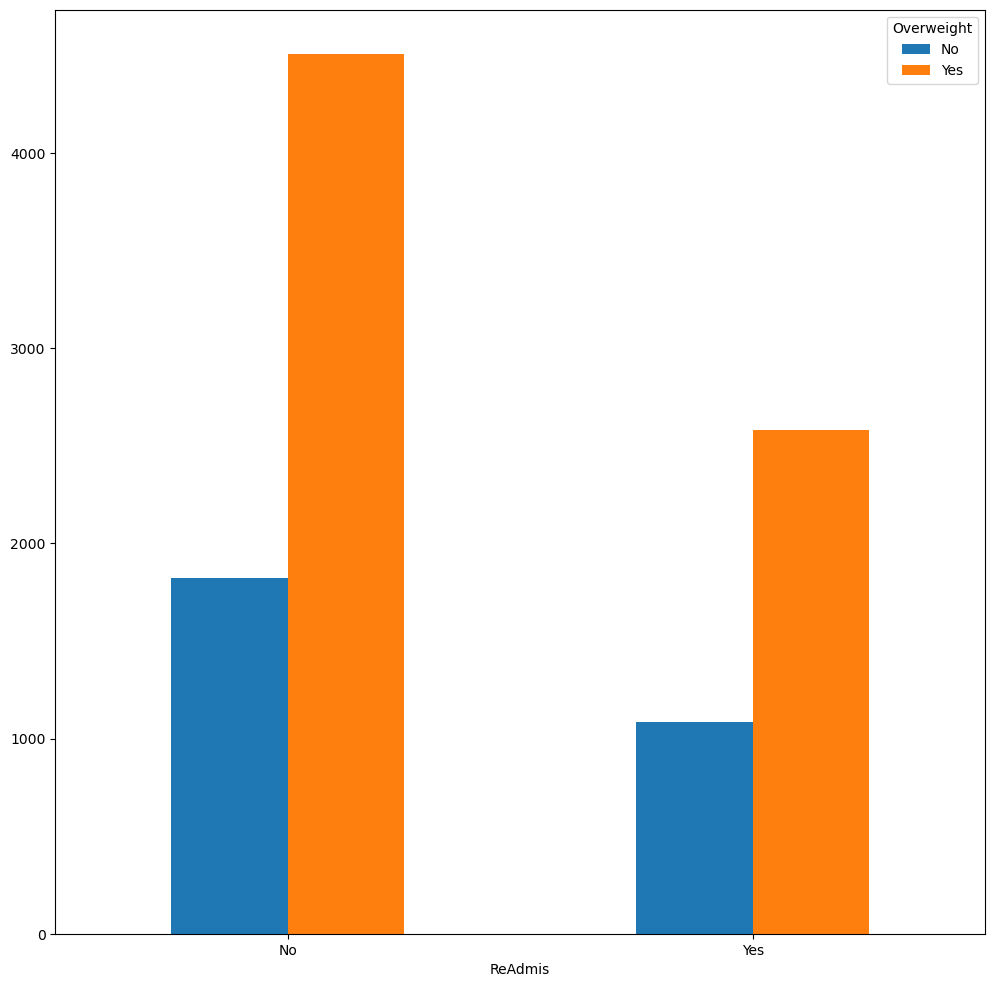

In [4]:
print(cross_table.plot.bar(figsize=(12,12), rot = 0))

## Section C:
    
    Section C1 tasks:
        
        1. Univariate distributions for two continuous variables.  
        Graph the variables using the appropriate graph.
        - Income
        - Total Charge
        
        2.  Univariate distributions for two categorical variables.  
        Graph the variables using the appropriate graph.
        - Gender
        - Complication_risk

### 1) Univariate distributions for two continuous variables.  

In [5]:
# Continuous variable distribution. Using Income and TotalCharge columns

# Get the counts of the values in the Income column.
print("The count of values in the Income: \n", medical_df['Income'].value_counts(ascending=False))

#  Show statistics about Income.
print("\nSummary statistics of Income: \n", medical_df['Income'].describe())

# Get the counts of the values in the Total Charge column.
print("The count of values in the Total Charge: \n", medical_df['TotalCharge'].value_counts(ascending=False))

#  Show statistics Total Charge.
print("\nSummary statistics of Total Charge: \n", medical_df['TotalCharge'].describe())

The count of values in the Income: 
 14572.40    2
20474.03    2
37132.97    2
29508.62    2
24997.02    2
           ..
41900.29    1
35093.92    1
44848.08    1
20815.96    1
62682.63    1
Name: Income, Length: 9993, dtype: int64

Summary statistics of Income: 
 count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64
The count of values in the Total Charge: 
 7555.452000    2
7964.681000    2
8081.346000    2
3726.702860    1
8449.859000    1
              ..
2345.477165    1
3672.779714    1
3392.003760    1
3866.635381    1
7887.553000    1
Name: TotalCharge, Length: 9997, dtype: int64

Summary statistics of Total Charge: 
 count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float

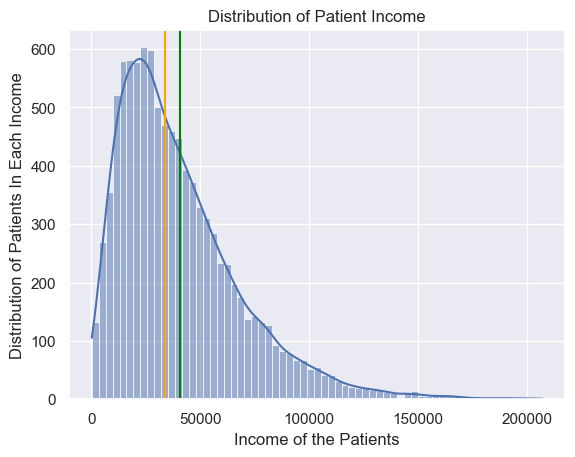

In [6]:
# Patient Income.
sns.set(style='darkgrid')

# Added Kernel distribution estimate (Holtz, n.d.).
sns.histplot(data=medical_df, x='Income', kde=True)
plt.title('Distribution of Patient Income')
plt.xlabel('Income of the Patients')
plt.ylabel('Distribution of Patients In Each Income')
plt.axvline(medical_df.Income.mean(), color='green')
plt.axvline(medical_df.Income.median(), color='orange')
plt.show()

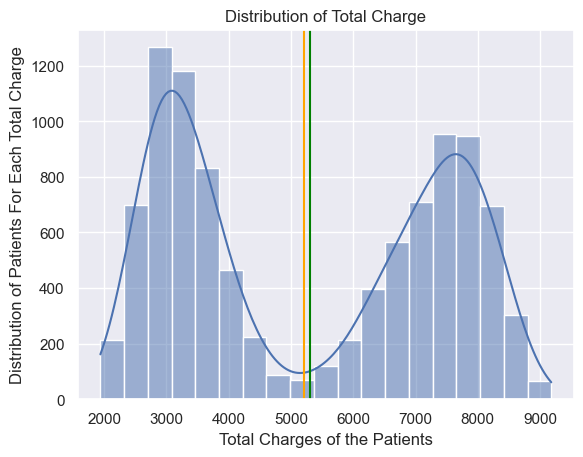

In [7]:
# Total Charge
# Added Kernel distribution estimate (Holtz, n.d.).
sns.histplot(data=medical_df, x='TotalCharge', kde=True)
plt.title('Distribution of Total Charge')
plt.xlabel('Total Charges of the Patients')
plt.ylabel('Distribution of Patients For Each Total Charge')
plt.axvline(medical_df.TotalCharge.mean(), color='green')
plt.axvline(medical_df.TotalCharge.median(), color='orange')
plt.show()

###  2)  Univariate distributions for two categorical variables.

The count of values in the Gender: 
 Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

Statistics for Gender are:  count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

The count of values in the Complication Risk: 
 Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

Statistics for Complication Risk are:  count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object


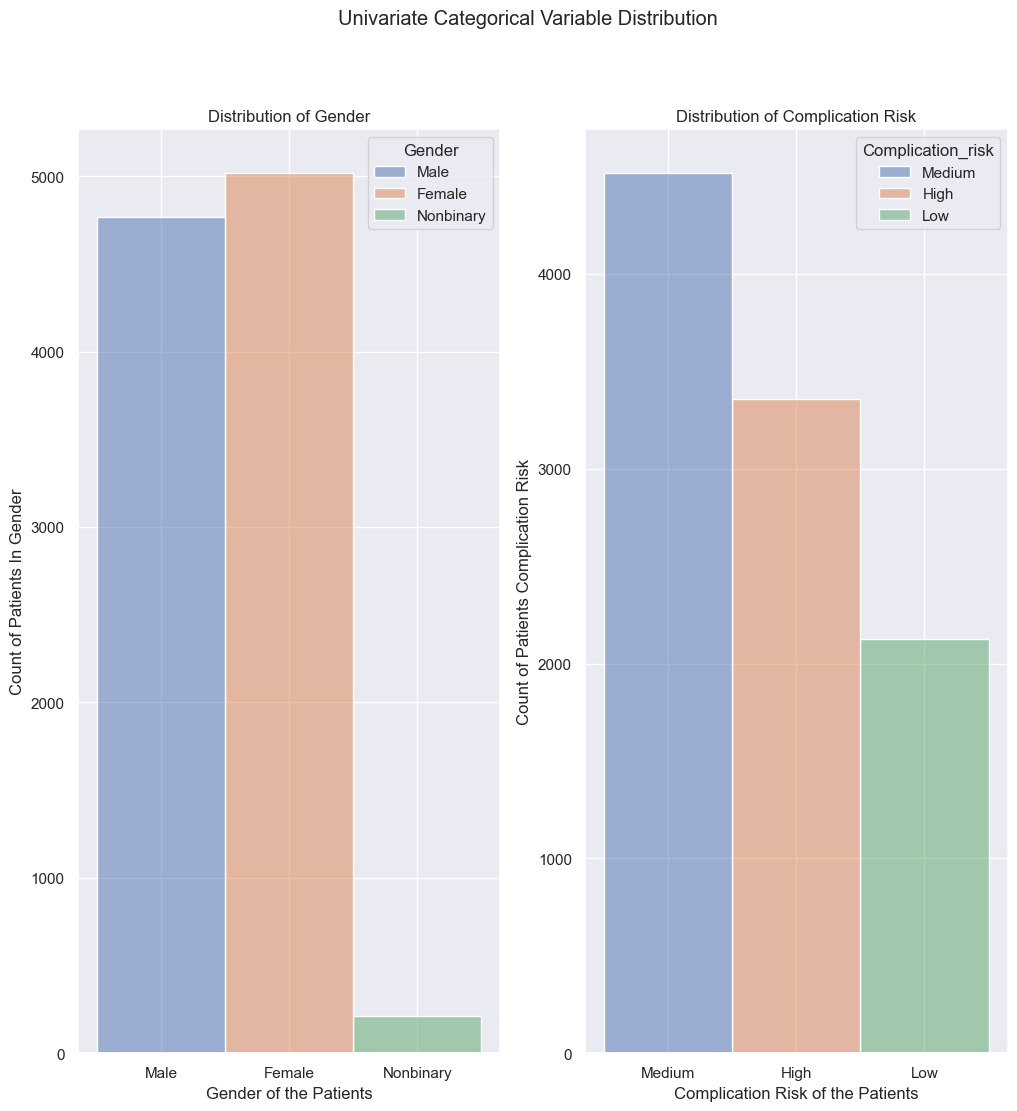

In [8]:
# Get the counts of the values in the Gender column.
print("The count of values in the Gender: \n", medical_df['Gender'].value_counts(ascending=False))
print("\nStatistics for Gender are: ", medical_df["Gender"].describe(include='object'))


# Get the counts of the values in the Complication Risk column.
print("\nThe count of values in the Complication Risk: \n", medical_df['Complication_risk'].value_counts(ascending=False))
print("\nStatistics for Complication Risk are: ", medical_df["Gender"].describe(include='object'))

fig, (ax1, ax2) = plt.subplots(figsize =(12, 12), ncols=2, 
                               sharex=False, sharey=False)
sns.histplot(data=medical_df, x='Gender', ax=ax1, hue=medical_df['Gender'], kde=False).set(title='Distribution of Gender'
                                                      , xlabel='Gender of the Patients'
                                                      , ylabel='Count of Patients In Gender')
sns.histplot(data=medical_df, x='Complication_risk', ax=ax2,hue=medical_df['Complication_risk'], kde=False).set(title='Distribution of Complication Risk'
                                                      , xlabel='Complication Risk of the Patients'
                                                      , ylabel='Count of Patients Complication Risk')
plt.suptitle("Univariate Categorical Variable Distribution")
plt.show()

## Section D:
    
    Section D tasks:
        
        1. Univariate distributions for two continuous variables.  
        Graph the variables using the appropriate graph.
        - Age
        - Initial_days
        
        2.  Univariate distributions for two categorical variables.  
        Graph the variables using the appropriate graph.
        - Gender
        - Complication_risk

### 1) Bivariate distributions for two continuous variables.

Correlation: 
                    Age  Initial_days
Age           1.000000      0.016264
Initial_days  0.016264      1.000000


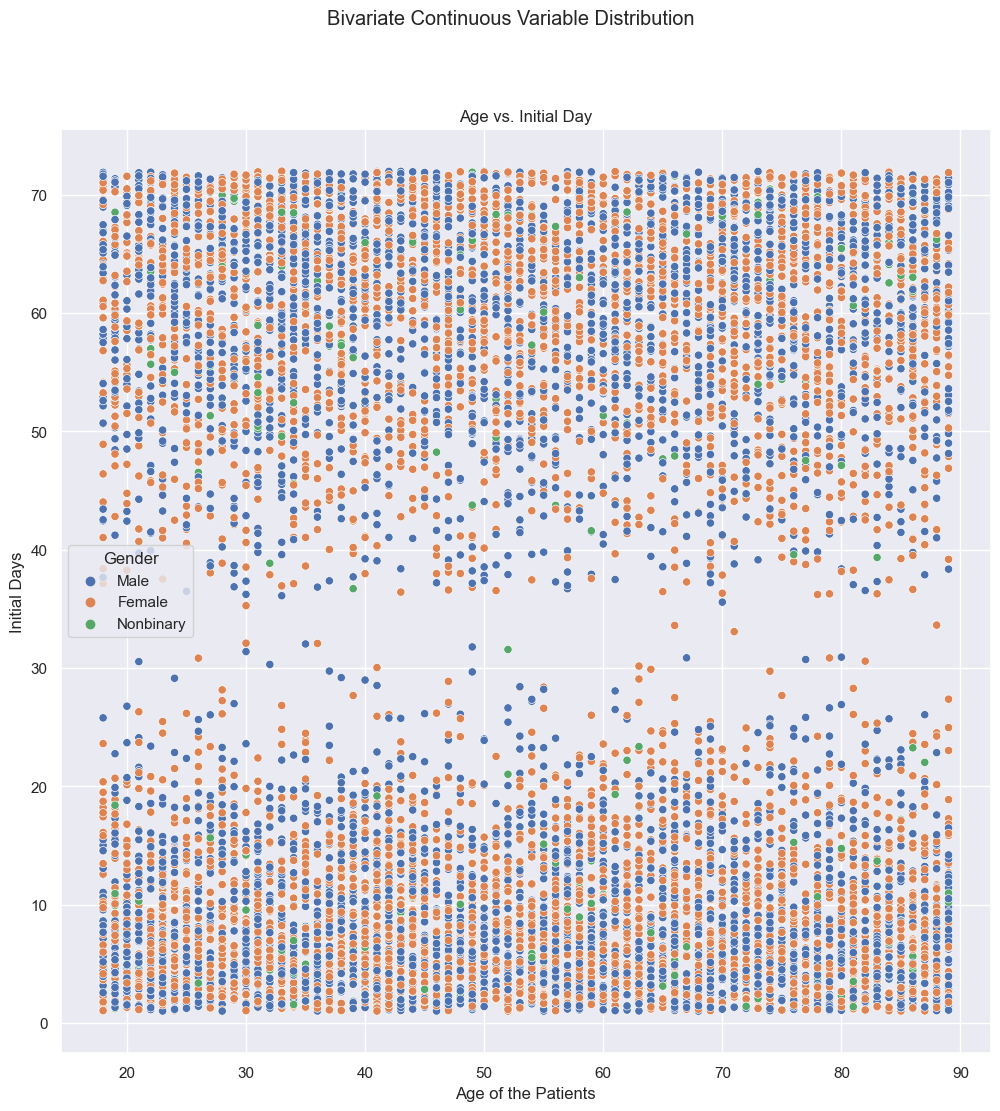

In [9]:
# check to see if there is a correlation.
print("Correlation: \n" , medical_df[['Age', 'Initial_days']].corr())

# Plot the scattterplot
fig, (ax1) = plt.subplots(figsize =(12, 12), ncols=1, 
                               sharex=False, sharey=False)

sns.scatterplot(data=medical_df, x="Age", y="Initial_days", hue='Gender', ax=ax1).set(title='Age vs. Initial Day'
                                                      , xlabel='Age of the Patients'
                                                      , ylabel='Initial Days')

plt.suptitle("Bivariate Continuous Variable Distribution")
plt.show()

### 2) Bivariate distributions for two Categorical variables.
The code that was reference for the creation of the component of the assessment is found at the following website "How to visualize the relationship between two categorical 	variables in Python – Thinking Neuron" 

Stroke       No   Yes
HighBlood            
No         4747  1163
Yes        3260   830
AxesSubplot(0.125,0.11;0.775x0.77)


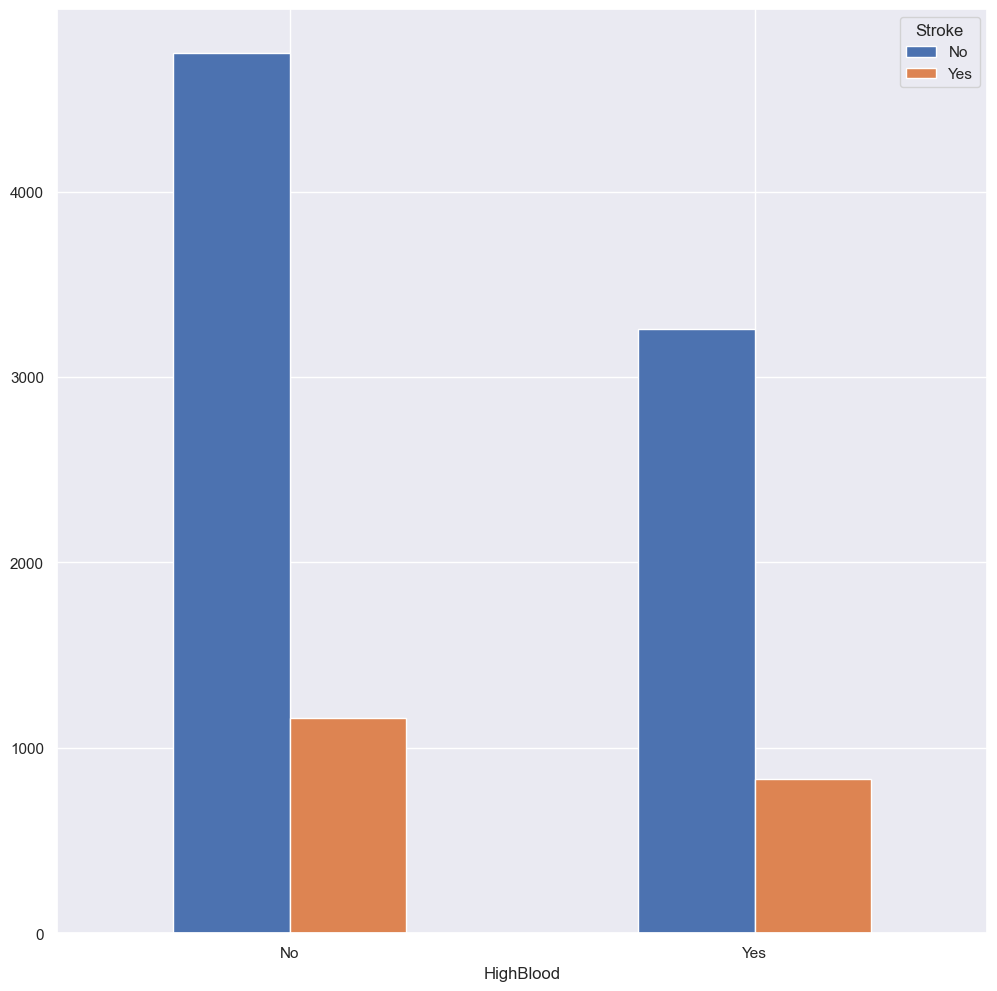

In [10]:
# Using Stroke and HighBlood pressure
# Cross tabulation of High Blood Pressure and Stroke
# (Hashmi & Hashmi, n.d.)
tabResult = pd.crosstab(index=medical_df['HighBlood']
                        , columns=medical_df['Stroke'])

# check the values.
print(tabResult)

print(tabResult.plot.bar(figsize=(12,12), rot = 0))